In [1]:
import pandas as pd

m_list = ['郑州', '开封', '平顶山', '洛阳', '焦作',
          '鹤壁', '新乡', '安阳', '濮阳', '商丘', '周口',
          '许昌', '漯河', '驻马店', '信阳', '南阳', '三门峡']

In [2]:
order = pd.read_csv('./order.csv')

In [3]:
order

,111110,Unnamed: 1,Unnamed: 2,郑州市,Unnamed: 4,Unnamed: 5,平顶山市,93.5
0,111111,NaN,NaN,郑州市,NaN,NaN,漯河市,61.5
1,111112,NaN,NaN,郑州市,NaN,NaN,驻马店市,22.5
2,111113,NaN,NaN,郑州市,NaN,NaN,平顶山市,56.5
3,111114,NaN,NaN,郑州市,NaN,NaN,开封市,49.5
4,111115,NaN,NaN,郑州市,NaN,NaN,驻马店市,45.5
5,111116,NaN,NaN,郑州市,NaN,NaN,开封市,10.5
6,111117,NaN,NaN,郑州市,NaN,NaN,焦作市,41.5
7,111118,NaN,NaN,郑州市,NaN,NaN,安阳市,76.5
8,111119,NaN,NaN,郑州市,NaN,NaN,平顶山市,26.5
9,111120,NaN,NaN,郑州市,NaN,NaN,平顶山市,13.5


In [4]:
order.columns = ['id', '1', '2', 'from', '3', '4', 'to', 'weight']

In [5]:
order = order[['from', 'to', 'weight']]

In [6]:
def func(arg):
    flag = 0
    for city in m_list:
        if city in arg:
            flag = 1
            break
    return 'exist error' if flag == 0 else arg

In [7]:
order['to'].value_counts()

鹤壁市     78
焦作市     71
漯河市     69
商丘市     66
安阳市     65
洛阳市     62
周口市     61
信阳市     58
开封市     57
平顶山市    56
三门峡市    55
濮阳市     52
许昌市     50
南阳市     49
新乡市     48
驻马店市    48
Name: to, dtype: int64

In [8]:
order['to'].apply(func).value_counts()

鹤壁市     78
焦作市     71
漯河市     69
商丘市     66
安阳市     65
洛阳市     62
周口市     61
信阳市     58
开封市     57
平顶山市    56
三门峡市    55
濮阳市     52
许昌市     50
南阳市     49
新乡市     48
驻马店市    48
Name: to, dtype: int64

In [9]:
'''
河南省:
郑州_0, 开封_1, 平顶山_2, 洛阳_3, 焦作_4,
鹤壁_5, 新乡_6, 安阳_7, 濮阳_8, 商丘_9, 周口_10,
许昌_11, 漯河_12, 驻马店_13, 信阳_14, 南阳_15, 三门峡_16
'''

#  邻接表表示无向图
init_data = {
    0: [2, 3, 4, 6, 1, 11],
    1: [0, 8, 9],
    2: [3, 0, 11, 12, 15],
    3: [4, 0, 2, 16],
    4: [3, 0, 6],
    5: [7, 8, 6],
    6: [5, 4, 0],
    7: [5],
    8: [5, 1],
    9: [1],
    10: [11, 12, 13],
    11: [0, 2, 12, 10],
    12: [2, 11, 10, 13],
    13: [10, 12, 14],
    14: [13, 15],
    15: [2, 14],
    16: [3],
}

# 0: (x_1, x_2) (经度, 纬度)
map_dict = {}

# 检验字典 0:[dis_1, dis_2]
check_dict = {}

m_list = ['郑州', '开封', '平顶山', '洛阳', '焦作',
          '鹤壁', '新乡', '安阳', '濮阳', '商丘', '周口',
          '许昌', '漯河', '驻马店', '信阳', '南阳', '三门峡']

content = '''河南省,郑州,113.65,34.76
河南省,开封,114.35,34.79
河南省,平顶山,113.29,33.75
河南省,洛阳,112.44,34.7
河南省,焦作,113.21,35.24
河南省,鹤壁,114.17,35.9
河南省,新乡,113.85,35.31
河南省,安阳,114.35,36.1
河南省,濮阳,114.98,35.71
河南省,商丘,115.65,34.44
河南省,周口,114.63,33.63
河南省,许昌,113.81,34.02
河南省,漯河,114.02,33.56
河南省,驻马店,114.02,32.98
河南省,信阳,114.08,32.13
河南省,南阳,112.53,33.01
河南省,三门峡,111.19,34.76
'''

for line in content.split('\n'):
    if line:
        _, city, x_1, x_2 = line.split(',')
        index = m_list.index(city)
        map_dict[index] = (float(x_1), float(x_2))

In [10]:
map_dict

{0: (113.65, 34.76),
 1: (114.35, 34.79),
 2: (113.29, 33.75),
 3: (112.44, 34.7),
 4: (113.21, 35.24),
 5: (114.17, 35.9),
 6: (113.85, 35.31),
 7: (114.35, 36.1),
 8: (114.98, 35.71),
 9: (115.65, 34.44),
 10: (114.63, 33.63),
 11: (113.81, 34.02),
 12: (114.02, 33.56),
 13: (114.02, 32.98),
 14: (114.08, 32.13),
 15: (112.53, 33.01),
 16: (111.19, 34.76)}

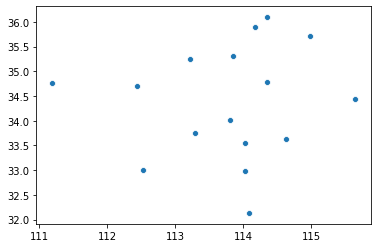

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans


x_list = [item[0] for item in map_dict.values()]
y_list = [item[1] for item in map_dict.values()]

sns.scatterplot(x_list[1:], y_list[1:])
# sns.scatterplot(x_list[0], y_list[0], c='red')

In [12]:
arr = [[item[0], item[1]] for index, item in enumerate(map_dict.values())]

data = pd.DataFrame(arr, columns=['x', 'y'])

In [13]:
data

,x,y
0,113.65,34.76
1,114.35,34.79
2,113.29,33.75
3,112.44,34.70
4,113.21,35.24
5,114.17,35.90
6,113.85,35.31
7,114.35,36.10
8,114.98,35.71
9,115.65,34.44


In [14]:
d = data.drop(index=15).copy()
d.reset_index()

,index,x,y
0,0,113.65,34.76
1,1,114.35,34.79
2,2,113.29,33.75
3,3,112.44,34.70
4,4,113.21,35.24
5,5,114.17,35.90
6,6,113.85,35.31
7,7,114.35,36.10
8,8,114.98,35.71
9,9,115.65,34.44


In [15]:
d = d.reset_index()

In [16]:
d

,index,x,y
0,0,113.65,34.76
1,1,114.35,34.79
2,2,113.29,33.75
3,3,112.44,34.70
4,4,113.21,35.24
5,5,114.17,35.90
6,6,113.85,35.31
7,7,114.35,36.10
8,8,114.98,35.71
9,9,115.65,34.44


In [17]:
n_cluster = 2
km = KMeans(n_clusters=n_cluster).fit(data)

In [18]:
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [19]:
import numpy as np

y_pred_ = km.predict(data)

In [20]:
y_pred_

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1])

In [21]:
centroid = km.cluster_centers_

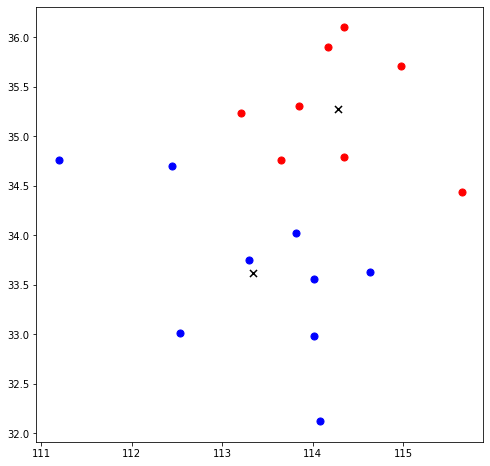

In [22]:
color = ['red', 'blue']
fig, ax1 = plt.subplots(1, figsize=(8, 8))
y_pred = km.labels_

# 画出对应分类的散点图
for i in range(n_cluster):
    ax1.scatter(data.iloc[y_pred==i, 0], data.iloc[y_pred==i, 1]
               ,marker='o'
               ,s=50
               ,c=color[i]
               )
    
# 画出聚类中心
ax1.scatter(centroid[:, 0], centroid[:, 1]
           ,marker='x'
           ,s=50
           ,c='black')

# ax1.scatter()
plt.show()

In [23]:
sjdlkfjsdelk;fjsad;lfkjsad

NameError: name 'sjdlkfjsdelk' is not defined

In [ ]:
# b 站上面那个分块显示聚类区域的弄一下

In [ ]:
def show(n_cluster, *args, **kwargs):
    km = KMeans(n_clusters=n_cluster).fit(data)
    y_pred_ = km.predict(data)
    centroid = km.cluster_centers_
    color = ['red', 'blue', 'green', *args]
    fig, ax1 = plt.subplots(1, figsize=(8, 8))
    y_pred = km.labels_

    # 画出对应分类的散点图
    for i in range(n_cluster):
        ax1.scatter(data.iloc[y_pred==i, 0], data.iloc[y_pred==i, 1]
                   ,marker='o'
                   ,s=50
                   ,c=color[i]
                   )
    if n_cluster == 3:
        print(y_pred)
    # 画出聚类中心
    ax1.scatter(centroid[:, 0], centroid[:, 1]
               ,marker='x'
               ,s=50
               ,c='black')
    
    xx = data['x'].mean()
    yy = data['y'].mean()
    ax1.scatter(xx, yy)
    plt.hlines(yy, 111, 116, colors = "black", linestyles = "dashed")
    plt.show()

In [ ]:
show(3)
show(4, 'yellow')
show(5, 'yellow', 'violet')

In [ ]:
# https://pyecharts.org/#/zh-cn/geography_charts

from pyecharts.charts import Geo
from pyecharts import options as opts
from pyecharts.globals import ChartType, SymbolType



def show_echarts(n_cluster, start="郑州"):
    km = KMeans(n_clusters=n_cluster).fit(data)
    index = m_list.index(start)
    
    def geo_visualmap_piecewise() -> Geo:
        c = (
            Geo()
            .add_schema(maptype="河南")
            .add("geo", [list(z) for z in zip(Faker.provinces, Faker.values())])
            .set_series_opts(label_opts=opts.LabelOpts(is_show=False))
            .set_global_opts(
                visualmap_opts=opts.VisualMapOpts(is_piecewise=True),
                title_opts=opts.TitleOpts(title="Geo-VisualMap（分段型）"),
            )
        )
        return c

In [ ]:
km.labels_

In [ ]:
km.predict(data)